## DATA PREPROCESSING

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

import lightgbm as lgb

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,silhouette_score
from sklearn.cluster import KMeans

In [2]:
# Load csv file
df=pd.read_csv("online_shoppers.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### Basic inspection on data

In [3]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [4]:
print(df.drop_duplicates())

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
print(df.dtypes)

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


### Checking outliers with boxplot

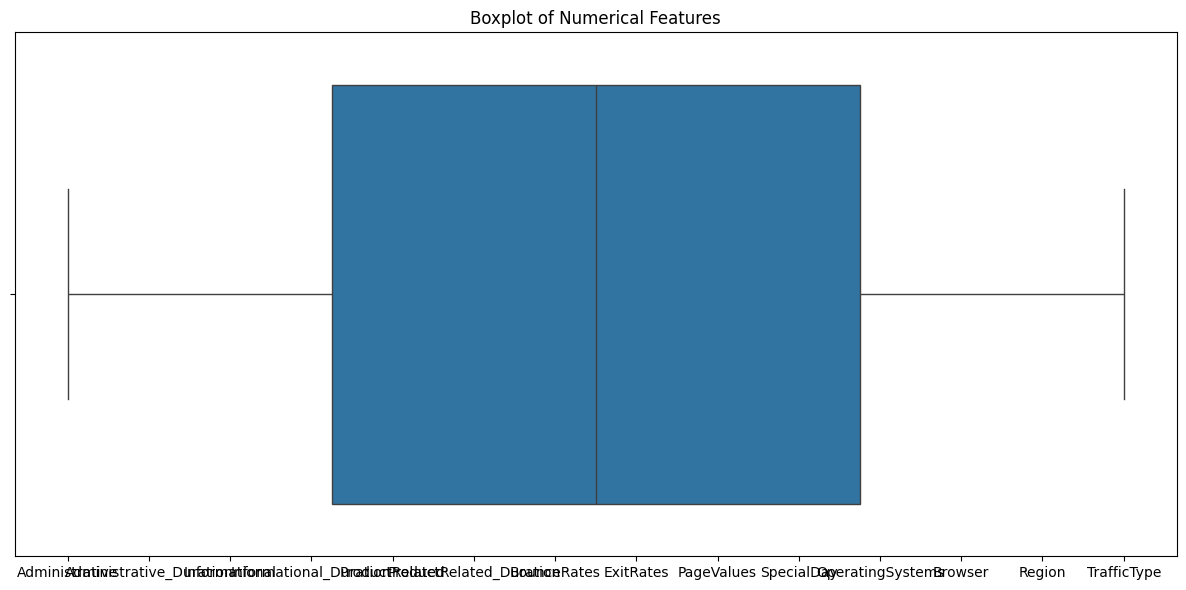

In [7]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].describe()

plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_cols, orient='h')  # horizontal boxplot
plt.title("Boxplot of Numerical Features")
plt.tight_layout()
plt.show()

### Identifying and removing outliers using z-score

In [8]:
from scipy.stats import zscore
z_scores = np.abs(zscore(df[numeric_cols]))

threshold = 3
mask = (z_scores < threshold).all(axis=1)
df1 = df[mask]

# Show result
print(f"Original shape: {df.shape}")
print(f"After removing outliers using Z-score: {df1.shape}")

Original shape: (12330, 18)
After removing outliers using Z-score: (9575, 18)


### Encoding categorical columns with Label Encoder

In [9]:
label_encode =LabelEncoder()
df1["Month"] = label_encode.fit_transform(df1["Month"])
df1["VisitorType"]= label_encode.fit_transform(df1["VisitorType"])

C:\Users\JAMEEMA\AppData\Local\Temp\ipykernel_12028\3031576426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Month"] = label_encode.fit_transform(df1["Month"])
C:\Users\JAMEEMA\AppData\Local\Temp\ipykernel_12028\3031576426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["VisitorType"]= label_encode.fit_transform(df1["VisitorType"])


In [10]:
df1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,2,2,2,1,3,2,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,2,2,4,1,2,2,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,False,False


In [11]:
# encoding boolean values
df1["Weekend"]=df1["Weekend"].astype(int)
df1["Revenue"] =df1["Revenue"].astype(int)

C:\Users\JAMEEMA\AppData\Local\Temp\ipykernel_12028\684779207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Weekend"]=df1["Weekend"].astype(int)
C:\Users\JAMEEMA\AppData\Local\Temp\ipykernel_12028\684779207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Revenue"] =df1["Revenue"].astype(int)


In [12]:
df1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,2,2,2,1,3,2,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,2,2,4,1,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,0


### Feature scaling for numerical columns

In [13]:
numeric_cols = ["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated",
                "ProductRelated_Duration","BounceRates","ExitRates","PageValues","SpecialDay"]
scaler = StandardScaler()
df1[numeric_cols] = scaler.fit_transform(df1[numeric_cols])
df1.head()

C:\Users\JAMEEMA\AppData\Local\Temp\ipykernel_12028\3992825412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[numeric_cols] = scaler.fit_transform(df1[numeric_cols])


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,-0.755753,-0.613351,-0.4143,-0.292434,-0.905309,-0.825254,-0.532960,2.172280,-0.375941,-0.254642,2,2,2,1,2,2,0,0
3,-0.755753,-0.613351,-0.4143,-0.292434,-0.905309,-0.879234,1.768505,3.494043,-0.375941,-0.254642,2,3,2,2,4,2,0,0
4,-0.755753,-0.613351,-0.4143,-0.292434,-0.618342,-0.329318,0.387626,0.520076,-0.375941,-0.254642,2,3,3,1,4,2,1,0
5,-0.755753,-0.613351,-0.4143,-0.292434,-0.295504,-0.745855,0.193818,-0.320519,-0.375941,-0.254642,2,2,2,1,3,2,0,0
9,-0.755753,-0.613351,-0.4143,-0.292434,-0.869438,-0.232067,-0.532960,-0.397815,-0.375941,3.071681,2,2,4,1,2,2,0,0


### Splitting features and target

In [14]:
X=df1.drop("Revenue",axis=1) #features
y=df1["Revenue"] #target variable

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, y_train

(      Administrative  Administrative_Duration  Informational  \
 672         0.346395                -0.499020      -0.414300   
 5469       -0.388370                -0.492295      -0.414300   
 8332        1.815925                 0.849415       0.785979   
 1726        0.713777                 0.758622      -0.414300   
 4609        0.713777                 0.425717      -0.414300   
 ...              ...                      ...            ...   
 7419        1.448542                 0.327863      -0.414300   
 6727        2.918072                 4.622341      -0.414300   
 6987       -0.020988                -0.034298       1.986258   
 1056       -0.755753                -0.613351      -0.414300   
 9335        2.183307                 0.425717      -0.414300   
 
       Informational_Duration  ProductRelated  ProductRelated_Duration  \
 672                -0.292434       -0.259634                -0.615448   
 5469               -0.292434        0.314300                -0.447424

## Visualization

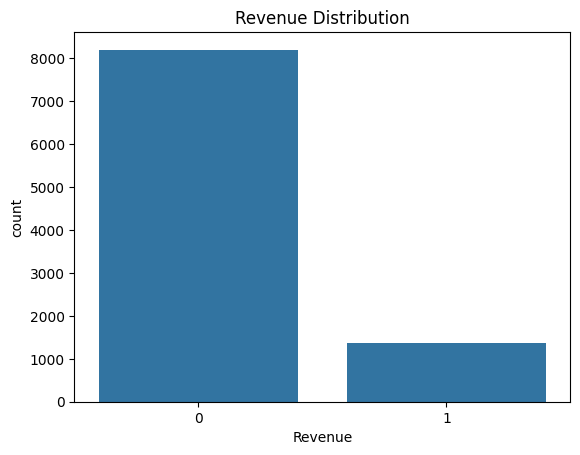

In [16]:
#visualization of Revenue distribution
sns.countplot(x='Revenue', data=df1)
plt.title("Revenue Distribution")
plt.show()

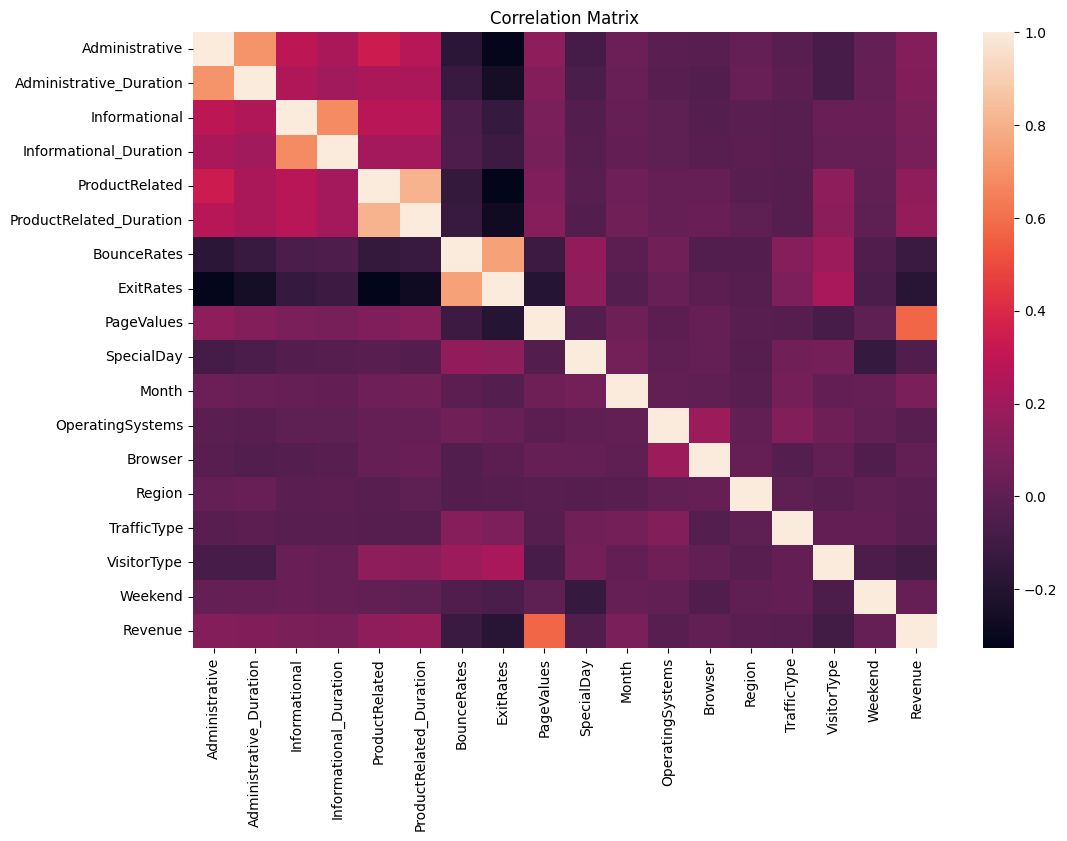

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr())
plt.title("Correlation Matrix")
plt.show()

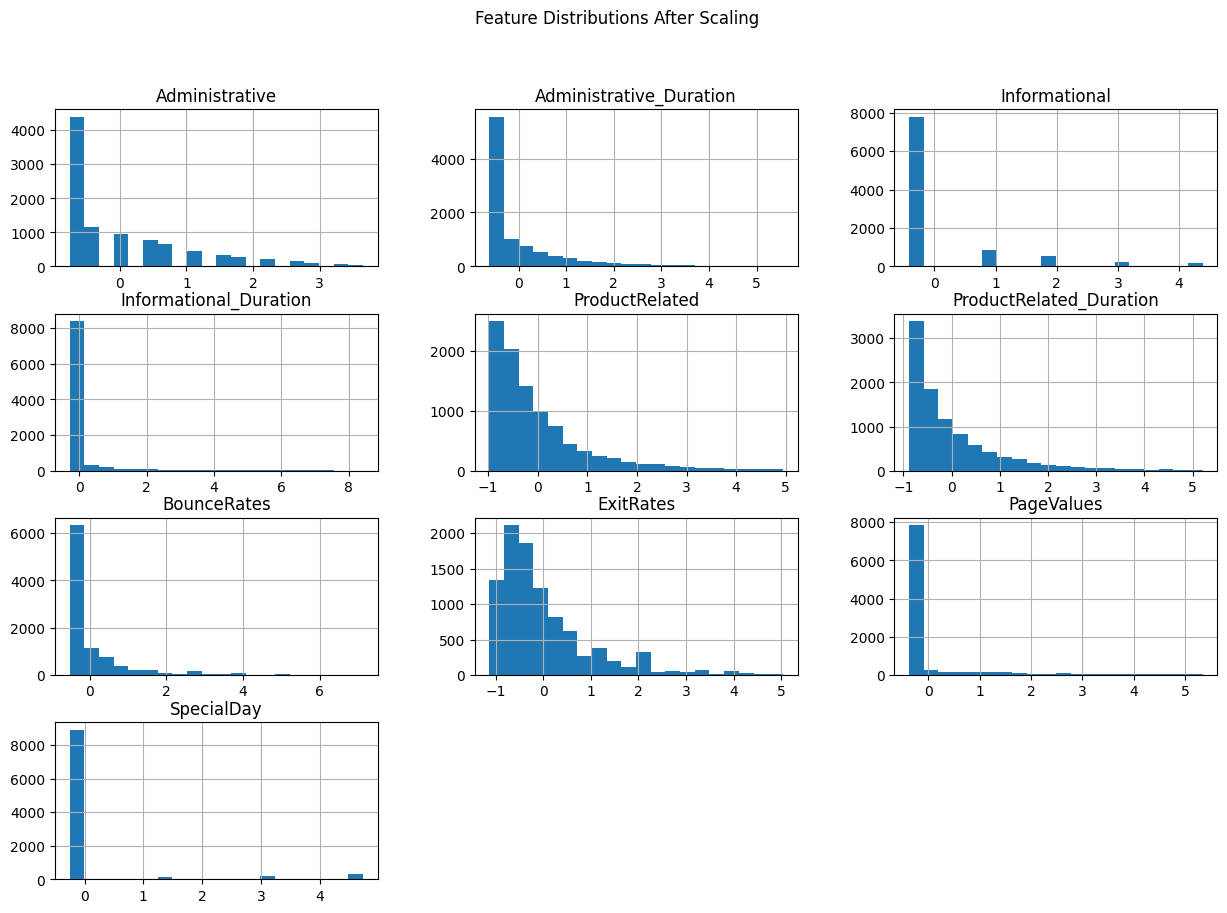

In [18]:
df1[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions After Scaling")
plt.show()

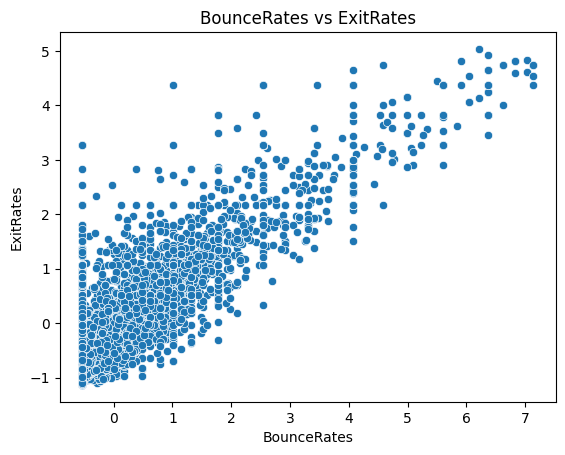

In [19]:
#scatter plot 
sns.scatterplot(x='BounceRates', y='ExitRates', data=df1)
plt.title("BounceRates vs ExitRates")
plt.show()

## Supervised learning 

### Logistic Regression

In [16]:

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8924469195962409
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2465
           1       0.72      0.40      0.51       408

    accuracy                           0.89      2873
   macro avg       0.81      0.69      0.73      2873
weighted avg       0.88      0.89      0.88      2873



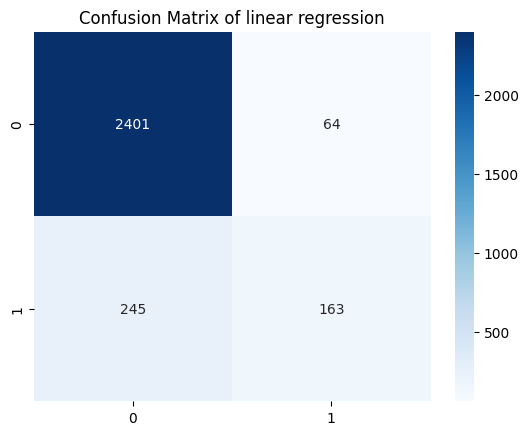

In [24]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Save it to the outputs/ folder
plt.title("Confusion Matrix of linear regression")
plt.savefig("results/CM_of_lr.png")
plt.show()

### Decision Tree Classifier

In [17]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.857640097459102
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2465
           1       0.50      0.53      0.51       408

    accuracy                           0.86      2873
   macro avg       0.71      0.72      0.72      2873
weighted avg       0.86      0.86      0.86      2873



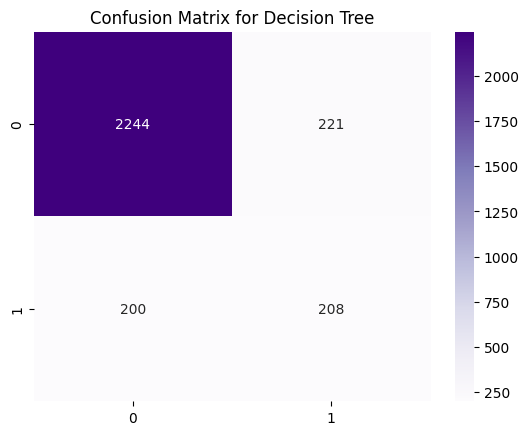

In [27]:

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')

plt.title("Confusion Matrix for Decision Tree")
plt.savefig("results/CM_of_dt.png")
plt.show()

### Random Forest Classifier

In [18]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9081099895579534
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2465
           1       0.74      0.54      0.63       408

    accuracy                           0.91      2873
   macro avg       0.83      0.76      0.79      2873
weighted avg       0.90      0.91      0.90      2873



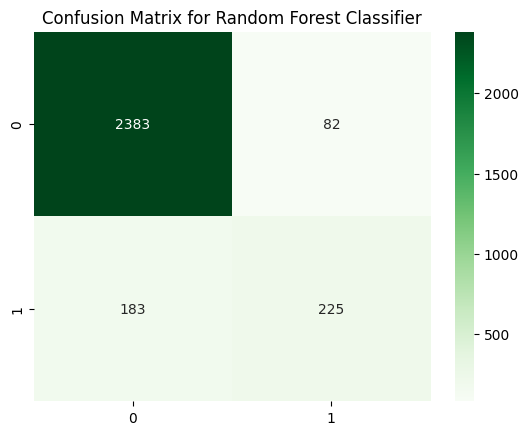

In [29]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

plt.title("Confusion Matrix for Random Forest Classifier")
plt.savefig("results/CM_of_rf.png")
plt.show()

### KNN Classifier

In [22]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8872258962756701
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2465
           1       0.69      0.37      0.48       408

    accuracy                           0.89      2873
   macro avg       0.80      0.67      0.71      2873
weighted avg       0.87      0.89      0.87      2873



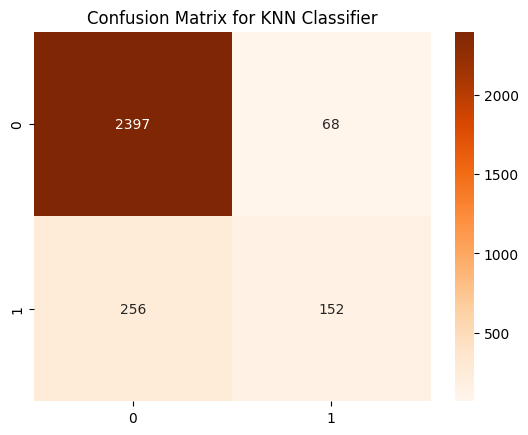

In [31]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')

plt.title("Confusion Matrix for KNN Classifier")
plt.savefig("results/CM_of_knn.png")
plt.show()

### Gradient boosting classifier

In [23]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.9025408980160111
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2465
           1       0.69      0.58      0.63       408

    accuracy                           0.90      2873
   macro avg       0.81      0.77      0.79      2873
weighted avg       0.90      0.90      0.90      2873



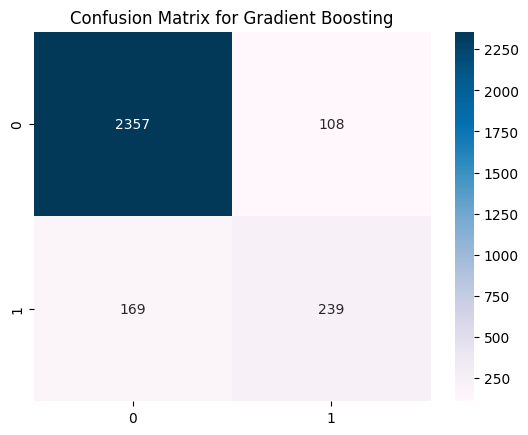

In [33]:
cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu')

plt.title("Confusion Matrix for Gradient Boosting")
plt.savefig("results/CM_of_gb.png")
plt.show()

### Lightgbm

In [24]:

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 963, number of negative: 5739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1756
[LightGBM] [Info] Number of data points in the train set: 6702, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143688 -> initscore=-1.784987
[LightGBM] [Info] Start training from score -1.784987
LightGBM Accuracy: 0.9067177166724678
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2465
           1       0.71      0.59      0.64       408

    accuracy                           0.91      2873
   macro avg       0.82      0.77      0.79      2873
weighted avg       0.90      0.91      0.90      2873



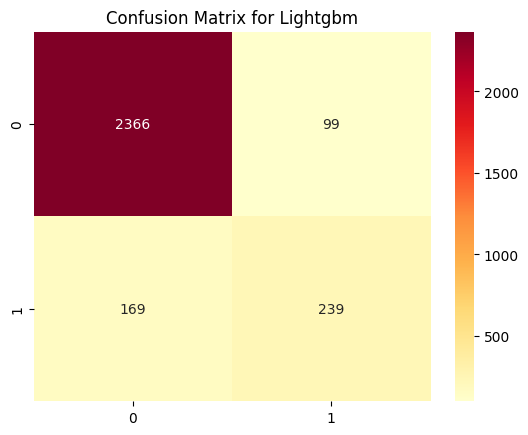

In [35]:
cm = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd')

plt.title("Confusion Matrix for Lightgbm")
plt.savefig("results/CM_of_lgb.png")
plt.show()

### Results

In [25]:
# Collect Results
final_results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "KNN": accuracy_score(y_test, y_pred_knn),
    
   
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb),
    
    "LightGBM": accuracy_score(y_test, y_pred_lgb),
  
}

# Create DataFrame
results_df1 = pd.DataFrame(list(final_results.items()), columns=['Model', 'Accuracy'])
results_df1 = results_df1.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print(results_df1)


                 Model  Accuracy
0        Random Forest  0.908110
1             LightGBM  0.906718
2    Gradient Boosting  0.902541
3  Logistic Regression  0.892447
4                  KNN  0.887226
5        Decision Tree  0.857640


## Visualization of model comparison

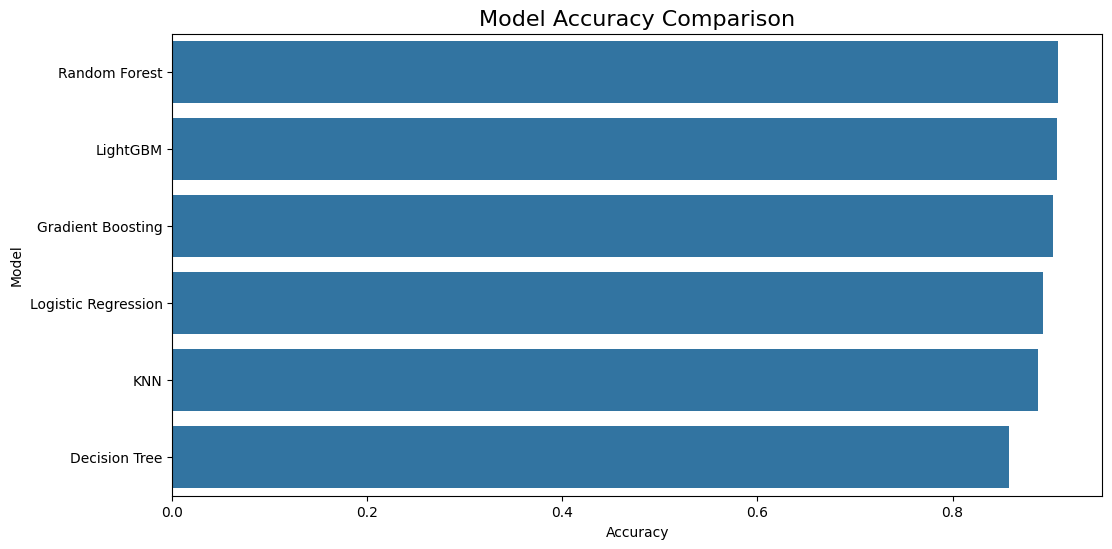

In [28]:
# Visualize the model comparison
plt.figure(figsize=(12,6))
sns.barplot(x='Accuracy', y='Model', data=results_df1)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.savefig("results/Model_accuracy_comparison.png")
plt.show()


## Unsupervised learning

### K - means clustering

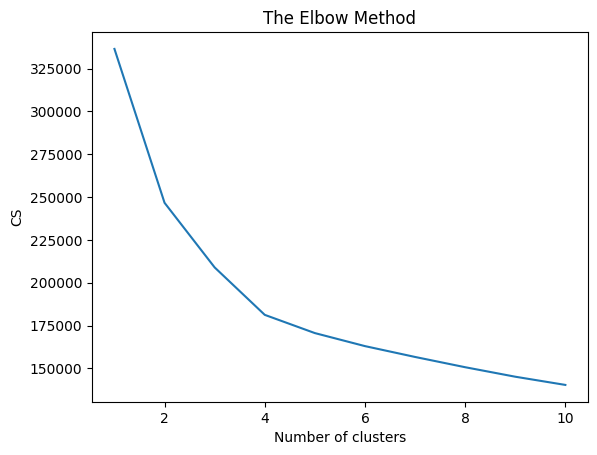

In [44]:
# finding the number of clusters using Elbow Method
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


In [45]:
kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_


correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 7138 out of 9575 samples were correctly labeled.
Accuracy score: 0.75


In [46]:
score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.36597356038445045


### Conclusion
In this project, we explored the Online Shoppers Purchasing Intention Dataset using both classification and clustering approaches to gain insights into user behavior and purchasing tendencies.

### Classification:
We applied multiple machine learning algorithms to predict whether a user would complete a purchase during their session. The models and their accuracies were as follows:

**Random Forest: 0.9081**

**LightGBM: 0.9067**

**Gradient Boosting: 0.9035**

**Logistic Regression: 0.8924**

**K-Nearest Neighbors (KNN): 0.8872**

**Decision Tree: 0.8559**

Among these, Random Forest Classifier and  LightGBM achieved the highest accuracy (≈ 90.8%), making them the most effective models for this classification task.

### Clustering:
We also applied K-Means Clustering to segment the sessions into user behavior groups. The clustering quality was evaluated using the Silhouette Score, which was 0.40 and an accuracy score of 0.73, indicating a meaningful and well-separated clustering structure.